# K_Means Algorithm

## Importing Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Read Dataset (PKL type)

In [36]:
with open('S13.pkl', 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [37]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]
w_label=s2_data['label']

In [38]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T
numpy_data2=np.array([w_ax, w_ay, w_az,w_bvp,w_eda,w_temp,w_label])
numpy_data2=numpy_data2.T

<ipython-input-38-aabd8313c500>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  numpy_data2=np.array([w_ax, w_ay, w_az,w_bvp,w_eda,w_temp,w_label])


In [39]:
df1 = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 
# df1.to_csv('f1')
df1.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.9726,-0.1412,0.2318,-0.272781,-0.004990,2.347183,32.627258,0.050354,0.0
1,0.9910,-0.0828,0.2078,-0.271042,-0.047882,2.367783,32.622772,0.404358,0.0
2,0.9978,-0.0230,0.0238,-0.263947,-0.067520,2.358627,32.621246,0.405884,0.0
3,1.0114,0.0406,-0.2766,-0.255386,-0.041428,2.349091,32.603302,0.404358,0.0
4,1.0318,0.0842,-0.4152,-0.261520,0.006638,2.359009,32.624237,0.396729,0.0


In [40]:
# Drop irrelevant features
df1.drop(['c_ax','c_ay','c_az'], axis=1, inplace=True)
df1

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,-0.272781,-0.004990,2.347183,32.627258,0.050354,0.0
1,-0.271042,-0.047882,2.367783,32.622772,0.404358,0.0
2,-0.263947,-0.067520,2.358627,32.621246,0.405884,0.0
3,-0.255386,-0.041428,2.349091,32.603302,0.404358,0.0
4,-0.261520,0.006638,2.359009,32.624237,0.396729,0.0
...,...,...,...,...,...,...
3875895,-0.120529,-0.020828,3.525162,34.109283,-0.611877,0.0
3875896,-0.136734,-0.006042,3.516769,34.168732,-0.517273,0.0
3875897,-0.151428,-0.004852,3.528595,34.167206,-0.517273,0.0
3875898,-0.157700,0.008011,3.516769,34.159607,-0.617981,0.0


In [41]:
print("shape",df1.shape)
print(len(df1))
print("w_label",len(w_label))

shape (3875900, 6)
3875900
w_label 3875900


baseline_indices 826001
stress_indices 464800
amusement_indices 267400
meditation_indices 556499
others_indices 1679300


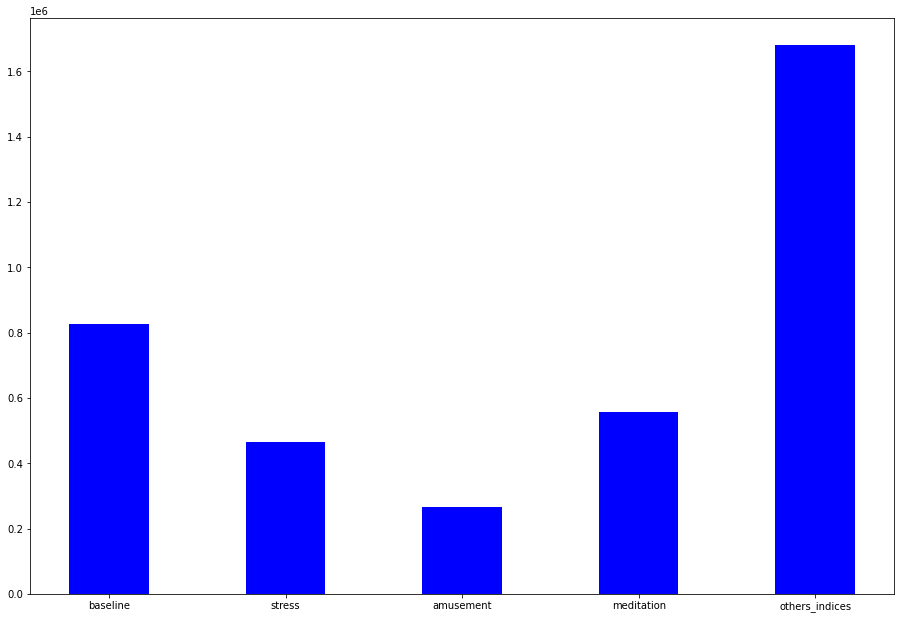

In [42]:
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]
others_indices = np.nonzero(s2_data['label']==0)[0]


print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))
print("others_indices", len(others_indices))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation", "others_indices"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices),len(others_indices)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)
fig.savefig('f1.png')
plt.show()

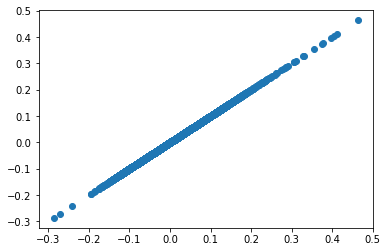

In [43]:
import seaborn as sns
import matplotlib

# sns.boxplot(df1['c_ecg'])
# df1.boxplot(column=['c_ecg'])

# fig, ax = plt.subplots(figsize = (18,10))
plt.scatter(df1['c_emg'], df1['c_emg'])

## Calculating IQR and Outliers

In [44]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
print((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)) )
print(df1.shape)

IQR is
 c_ecg      0.112885
c_emg      0.013916
c_eda      1.089859
c_temp     0.297119
c_resp     4.855347
w_label    2.000000
dtype: float64
         c_ecg  c_emg  c_eda  c_temp  c_resp  w_label
0         True  False  False    True   False    False
1         True   True  False    True   False    False
2         True   True  False    True   False    False
3        False   True  False    True   False    False
4         True  False  False    True   False    False
...        ...    ...    ...     ...     ...      ...
3875895  False  False  False   False   False    False
3875896  False  False  False   False   False    False
3875897  False  False  False   False   False    False
3875898  False  False  False   False   False    False
3875899  False  False  False   False   False    False

[3875900 rows x 6 columns]
(3875900, 6)


## Removing Outliers

In [45]:
df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2819683, 6)


In [46]:
df_out

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
205109,-0.058228,-0.002609,2.376175,33.499084,-3.305054,1.0
236322,-0.168961,0.002884,2.377319,33.509674,1.087952,1.0
241061,-0.237122,0.001282,2.373123,33.500580,1.579285,1.0
241088,-0.107254,-0.010803,2.382278,33.508148,1.866150,1.0
241439,-0.002151,0.002655,2.372742,33.542938,2.900696,1.0
...,...,...,...,...,...,...
3875895,-0.120529,-0.020828,3.525162,34.109283,-0.611877,0.0
3875896,-0.136734,-0.006042,3.516769,34.168732,-0.517273,0.0
3875897,-0.151428,-0.004852,3.528595,34.167206,-0.517273,0.0
3875898,-0.157700,0.008011,3.516769,34.159607,-0.617981,0.0


<AxesSubplot:>

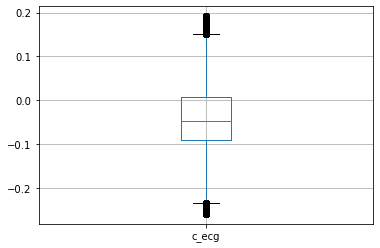

In [47]:
df_out.boxplot(column=['c_ecg'])

In [48]:
(df_out.describe())

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.819683e+06,2.819683e+06,2.819683e+06,2.819683e+06,2.819683e+06,2.819683e+06
mean,-4.004439e-02,-2.825759e-03,3.156598e+00,3.409786e+01,-6.786412e-02,1.372830e+00
std,8.360502e-02,9.794082e-03,5.916773e-01,2.289234e-01,3.501865e+00,1.607183e+00
min,-2.597351e-01,-3.089905e-02,2.091599e+00,3.349304e+01,-9.672546e+00,0.000000e+00
25%,-9.022522e-02,-9.063721e-03,2.665710e+00,3.403311e+01,-2.267456e+00,0.000000e+00
50%,-4.637146e-02,-2.609253e-03,3.055573e+00,3.413974e+01,-2.868652e-01,1.000000e+00
75%,6.454468e-03,3.341675e-03,3.535080e+00,3.422827e+01,2.169800e+00,3.000000e+00
max,1.918030e-01,2.476501e-02,5.179214e+00,3.467853e+01,9.748840e+00,5.000000e+00


In [49]:
def converter(w_label):
    if w_label==0:
        return 'transient'
    elif w_label==1:
        return 'baseline'
    elif w_label==2:
        return 'stress'
    elif w_label==3:
        return 'amusement'
    elif w_label==4:
        return 'meditation'   
    else:
        return 'ignored'

df1['Labels'] = df1['w_label'].apply(converter)
cols = df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
Labeled_Data = df1[cols]
Labeled_Data.drop(['w_label'], axis=1, inplace=True)
Labeled_Data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
0,transient,-0.272781,-0.004990,2.347183,32.627258,0.050354
1,transient,-0.271042,-0.047882,2.367783,32.622772,0.404358
2,transient,-0.263947,-0.067520,2.358627,32.621246,0.405884
3,transient,-0.255386,-0.041428,2.349091,32.603302,0.404358
4,transient,-0.261520,0.006638,2.359009,32.624237,0.396729
...,...,...,...,...,...,...
3875895,transient,-0.120529,-0.020828,3.525162,34.109283,-0.611877
3875896,transient,-0.136734,-0.006042,3.516769,34.168732,-0.517273
3875897,transient,-0.151428,-0.004852,3.528595,34.167206,-0.517273
3875898,transient,-0.157700,0.008011,3.516769,34.159607,-0.617981


In [50]:
filter1 = Labeled_Data['Labels'] == 'meditation'
Labeled_Data.drop(index=Labeled_Data[filter1].index, inplace = True)
filter2 = Labeled_Data['Labels'] == 'ignored'
Labeled_Data.drop(index=Labeled_Data[filter2].index, inplace = True)
filter3 = Labeled_Data['Labels'] == 'transient'
Labeled_Data.drop(index=Labeled_Data[filter3].index, inplace = True)
Labeled_Data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
61534,baseline,-0.206268,-0.003983,2.383423,32.814331,0.721741
61535,baseline,-0.237213,0.040970,2.416992,32.830811,0.750732
61536,baseline,-0.269028,0.076492,2.375793,32.794861,0.776672
61537,baseline,-0.287247,0.037903,2.373123,32.832306,0.762939
61538,baseline,-0.296310,0.020004,2.376175,32.806824,0.787354
...,...,...,...,...,...,...
2747430,stress,-0.014374,-0.002609,4.037094,34.319916,-7.708740
2747431,stress,-0.017624,-0.002151,4.054260,34.322998,-7.704163
2747432,stress,-0.015793,-0.000183,4.042435,34.327576,-7.708740
2747433,stress,-0.009933,0.007278,4.037476,34.339813,-7.701111


In [29]:
Labeled_Data.to_csv('fx')

## Data Segmentation (Sliding Window)

In [72]:
#sliding window and feature extraction

X=Labeled_Data.iloc[:,1:]
X_mean=X.rolling(60).mean()
X_std=X.rolling(60).std()
Labeled_Data.head()

,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
61534,baseline,-0.206268,-0.003983,2.383423,32.814331,0.721741
61535,baseline,-0.237213,0.040970,2.416992,32.830811,0.750732
61536,baseline,-0.269028,0.076492,2.375793,32.794861,0.776672
61537,baseline,-0.287247,0.037903,2.373123,32.832306,0.762939
61538,baseline,-0.296310,0.020004,2.376175,32.806824,0.787354


## Feature Extraction

In [74]:
FeaturesDF=pd.concat([Labeled_Data.iloc[:,:1],X_mean,X_std],keys=['','Mean','SD'], axis=1)
FeaturesDF=FeaturesDF[59::30]
Label=FeaturesDF[('','Labels')]
X_new=FeaturesDF[[('Mean','c_ecg'),('SD','c_ecg'),('Mean','c_emg'),('SD','c_emg'),('Mean','c_eda'),('SD','c_eda'),('Mean','c_temp'),('SD','c_temp'),('Mean','c_resp'),('SD','c_resp')]]
pd.DataFrame(FeaturesDF.value_counts())

FeaturesDF

Mean                                           \
           Labels     c_ecg     c_emg     c_eda     c_temp    c_resp   
61593    baseline -0.157715  0.000594  2.379449  32.818006  1.343079   
61623    baseline -0.049293 -0.005279  2.377777  32.818455  2.011820   
61653    baseline  0.035429 -0.001013  2.377383  32.818979  2.725067   
61683    baseline  0.135710 -0.002422  2.377885  32.818155  3.458659   
61713    baseline  0.146833 -0.003096  2.378559  32.817979  4.153442   
...           ...       ...       ...       ...        ...       ...   
2747313    stress -0.010059 -0.004520  4.047432  34.322584 -8.370997   
2747343    stress  0.043668 -0.004581  4.045773  34.317359 -8.225810   
2747373    stress -0.009698 -0.004080  4.047407  34.317693 -8.085963   
2747403    stress -0.057015 -0.001479  4.048271  34.318840 -7.954865   
2747433    stress -0.034661 -0.002132  4.045893  34.315707 -7.825089   

               SD                                          
            c_ecg     c_emg     c_eda    c_temp    c_resp  
61593    0.082936  0.024431  0.010105  0.012335  0.384936  
61623    0.051635  0.023032  0.008252  0.011902  0.405896  
61653    0.054974  0.026841  0.008490  0.011385  0.439574  
61683    0.072543  0.023718  0.011923  0.012399  0.419819  
61713    0.090964  0.019483  0.012367  0.014323  0.415016  
...           ...       ...       ...       ...       ...  
2747313  0.056235  0.011319  0.006419  0.026200  0.083760  
2747343  0.027567  0.011330  0.007437  0.023250  0.086181  
2747373  0.064139  0.008325  0.013820  0.023921  0.079419  
2747403  0.030045  0.013409  0.013611  0.024841  0.078733  
2747433  0.029871  0.014658  0.007975  0.027991  0.078420  

[51939 rows x 11 columns]

In [39]:
FeaturesDF.to_csv('f55')

## Feature Normalization

In [75]:
from sklearn.preprocessing import normalize
X=FeaturesDF.iloc[:,[1,2,3,4,5,6,7,8,9,10]]  #independent variable X
y=FeaturesDF.iloc[:,0] #dependent variable y

X=normalize(X)
norm_df = pd.DataFrame(X)
norm_df

,0,1,2,3,4,5,6,7,8,9
0,-0.004789,0.000018,0.072248,0.996469,0.040781,0.002518,0.000742,0.000307,0.000375,0.011688
1,-0.001495,-0.000160,0.072123,0.995448,0.061022,0.001566,0.000699,0.000250,0.000361,0.012312
2,0.001073,-0.000031,0.071997,0.993893,0.082526,0.001665,0.000813,0.000257,0.000345,0.013312
3,0.004101,-0.000073,0.071864,0.991830,0.104528,0.002192,0.000717,0.000360,0.000375,0.012688
4,0.004427,-0.000093,0.071712,0.989440,0.125224,0.002743,0.000587,0.000373,0.000432,0.012512
...,...,...,...,...,...,...,...,...,...,...
51934,-0.000283,-0.000127,0.113820,0.965205,-0.235406,0.001581,0.000318,0.000181,0.000737,0.002355
51935,0.001229,-0.000129,0.113899,0.966121,-0.231578,0.000776,0.000319,0.000209,0.000655,0.002426
51936,-0.000273,-0.000115,0.114046,0.966991,-0.227843,0.001807,0.000235,0.000389,0.000674,0.002238
51937,-0.001608,-0.000042,0.114162,0.967799,-0.224329,0.000847,0.000378,0.000384,0.000701,0.002220


## Split the Data into Training and Testing Sets

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=45, shuffle=True)

## Applying k-means algorithm

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=3, max_iter=1000, random_state=4)
y_kmeans=kmeans.fit_predict(X_train)

In [88]:
LabelsClustersDF = pd.DataFrame({'Clusters': y_kmeans, 'Given Labels': y_train})
ClustersDataDF = pd.DataFrame({'Clusters': y_kmeans, 'mean c_ecg': X_train[:,0], 'mean c_emg': X_train[:,1], 
                               'mean c_eda': X_train[:,2], 'mean c_temp': X_train[:,3], 'mean c_resp': X_train[:,4],
                               'std c_ecg': X_train[:,5], 'std c_emg': X_train[:,6], 'std c_eda': X_train[:,7],
                               'std c_temp': X_train[:,8], 'std c_resp': X_train[:,9]})


LabelsClustersDF = pd.DataFrame({'Clusters': y_kmeans, 'Given Labels': y_train})
LabelsClustersDF

,Clusters,Given Labels
252993,0,baseline
307143,1,baseline
1315053,0,amusement
2328903,0,stress
113973,0,baseline
...,...,...
1312863,0,amusement
551103,1,baseline
448443,0,baseline
241953,0,baseline


In [89]:
#crosstab matrix (pivot table)

ctMatrix = pd.crosstab(LabelsClustersDF['Clusters'], LabelsClustersDF['Given Labels'], margins=True, margins_name='All')
ctMatrix

Given Labels,amusement,baseline,stress,All
Clusters,,,,
0,3623,11016,5166,19805
1,1026,3293,2119,6438
2,749,2124,2047,4920
All,5398,16433,9332,31163


In [90]:
#converting the clusters numbers we get into names

def convr(label):
    if label==0:
        return 'baseline'
    elif label==1:
        return 'amusement'
    elif label==2:
        return 'stress'
    
LabelsClustersDF['NumbersAsLabels'] = LabelsClustersDF['Clusters'].apply(convr)
LabelsClustersDF['NumbersAsLabels']

252993      baseline
307143     amusement
1315053     baseline
2328903     baseline
113973      baseline
             ...    
1312863     baseline
551103     amusement
448443      baseline
241953      baseline
258333      baseline
Name: NumbersAsLabels, Length: 31163, dtype: object

In [91]:
#getting Clustering report, Confusion Matrix, and Accuracy Score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(LabelsClustersDF['NumbersAsLabels'], LabelsClustersDF['Given Labels']))
print(confusion_matrix(LabelsClustersDF['NumbersAsLabels'], LabelsClustersDF['Given Labels']))
accuracy_score(LabelsClustersDF['NumbersAsLabels'], LabelsClustersDF['Given Labels'])

              precision    recall  f1-score   support

   amusement       0.19      0.16      0.17      6438
    baseline       0.67      0.56      0.61     19805
      stress       0.22      0.42      0.29      4920

    accuracy                           0.45     31163
   macro avg       0.36      0.38      0.36     31163
weighted avg       0.50      0.45      0.47     31163

[[ 1026  3293  2119]
 [ 3623 11016  5166]
 [  749  2124  2047]]


0.4521066649552354

In [66]:
#Reducing the 10 dimensions into 2 dimensions using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
projected = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[ 0.04347939, -0.02332874],
       [-0.09277917, -0.02244218],
       [-0.09069653, -0.02174242],
       ...,
       [ 0.06711334, -0.02255528],
       [-0.02118349, -0.01892215],
       [-0.00099071, -0.01211529]])

In [68]:
PCA_df = pd.DataFrame({'PCA1':projected[:,0],
                        'PCA2':projected[:,1],
                        'Clusters':LabelsClustersDF['NumbersAsLabels'],
                        'Actual Labels':LabelsClustersDF['Given Labels']})
PCA_df

,PCA1,PCA2,Clusters,Actual Labels
160861,0.043479,-0.023329,stress,baseline
623069,-0.092779,-0.022442,stress,baseline
172893,-0.090697,-0.021742,stress,baseline
1290029,0.239544,-0.000166,baseline,amusement
2723313,0.003145,0.022364,stress,stress
...,...,...,...,...
82653,0.024965,-0.022271,stress,baseline
2700913,0.032996,0.023044,stress,stress
831325,0.067113,-0.022555,stress,baseline
1178413,-0.021183,-0.018922,stress,amusement


In [71]:
print(X_train.shape)
print(projected.shape)

(7303, 2)
(7303, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


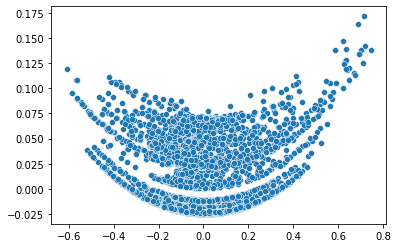

In [69]:
#plotting the data as 2D without clusters

sns.scatterplot(projected[:, 0], projected[:, 1],
              data=PCA_df);
plt.savefig('PCA_Plot_withoutClustersKmeans.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


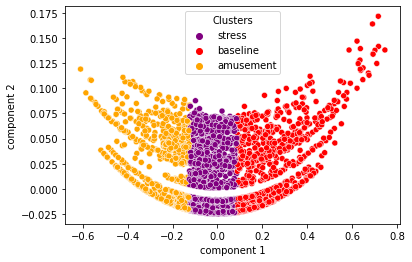

In [70]:
#plotting the data as 2D with clusters

sns.scatterplot(projected[:, 0], projected[:, 1],
              hue="Clusters",
              palette=['purple','red','orange'],
              legend='full',
              data=PCA_df);
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.savefig('PCA_Plot_Kmeans.png')

In [92]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, max_iter=20, init_params='kmeans', random_state=0)
GMM = gmm.fit(X_train)
proba = gmm.predict_proba(X_train)
prediction_gmm = gmm.predict(X_train)

In [93]:
LabelsClustersDF = pd.DataFrame({'Clusters': prediction_gmm, 'Given Labels': y_train})
ClustersDataDF = pd.DataFrame({'Clusters': prediction_gmm, 'mean c_ecg': X_train[:,0], 'mean c_emg': X_train[:,1], 
                               'mean c_eda': X_train[:,2], 'mean c_temp': X_train[:,3], 'mean c_resp': X_train[:,4],
                               'std c_ecg': X_train[:,5], 'std c_emg': X_train[:,6], 'std c_eda': X_train[:,7],
                               'std c_temp': X_train[:,8], 'std c_resp': X_train[:,9]})


LabelsClustersDF = pd.DataFrame({'Clusters': prediction_gmm, 'Given Labels': y_train})
LabelsClustersDF

,Clusters,Given Labels
252993,2,baseline
307143,0,baseline
1315053,2,amusement
2328903,2,stress
113973,2,baseline
...,...,...
1312863,2,amusement
551103,0,baseline
448443,2,baseline
241953,2,baseline


In [94]:
ctMatrix = pd.crosstab(LabelsClustersDF['Clusters'], LabelsClustersDF['Given Labels'], margins=True, margins_name='All')
ctMatrix

Given Labels,amusement,baseline,stress,All
Clusters,,,,
0,934,3017,2141,6092
1,660,2001,1872,4533
2,3804,11415,5319,20538
All,5398,16433,9332,31163


In [95]:
#converting the clusters numbers we get into names

def convr(label):
    if label==0:
        return 'baseline'
    elif label==1:
        return 'amusement'
    elif label==2:
        return 'stress'
    
LabelsClustersDF['NumbersAsLabels'] = LabelsClustersDF['Clusters'].apply(convr)
LabelsClustersDF['NumbersAsLabels']

252993       stress
307143     baseline
1315053      stress
2328903      stress
113973       stress
             ...   
1312863      stress
551103     baseline
448443       stress
241953       stress
258333       stress
Name: NumbersAsLabels, Length: 31163, dtype: object

In [96]:
#getting Clustering report, Confusion Matrix, and Accuracy Score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(LabelsClustersDF['NumbersAsLabels'], LabelsClustersDF['Given Labels']))
print(confusion_matrix(LabelsClustersDF['NumbersAsLabels'], LabelsClustersDF['Given Labels']))
accuracy_score(LabelsClustersDF['NumbersAsLabels'], LabelsClustersDF['Given Labels'])

              precision    recall  f1-score   support

   amusement       0.12      0.15      0.13      4533
    baseline       0.18      0.50      0.27      6092
      stress       0.57      0.26      0.36     20538

    accuracy                           0.29     31163
   macro avg       0.29      0.30      0.25     31163
weighted avg       0.43      0.29      0.31     31163

[[  660  2001  1872]
 [  934  3017  2141]
 [ 3804 11415  5319]]


0.28867567307383757